In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from math import *
from math import pi
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [ ]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
df.shape

(26707, 34)

In [ ]:
df.size

908038

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [ ]:
df.sex.mode()

0    Female
Name: sex, dtype: object

In [ ]:
my_list = df.columns.values.tolist()
for i in my_list:
  if df[i].dtype == 'O':
    df[i].fillna(df[i].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                    0
race                             0
sex                              0
income_level                     0
marital_status                   0
housing_status      

In [ ]:
#We cant write mean or median in place of float or int type beacuse we cant really say about them and may lead to misclassification
#So we remove columns with more nul values

df = df.drop(['unique_id'], axis=1)

In [ ]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
df1 = df.dropna()

In [ ]:
df1.shape

(13506, 33)

In [ ]:
df1.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [ ]:
df.shape

(26707, 33)

In [ ]:
#We will remove some unwanted columns after DataVisualization

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

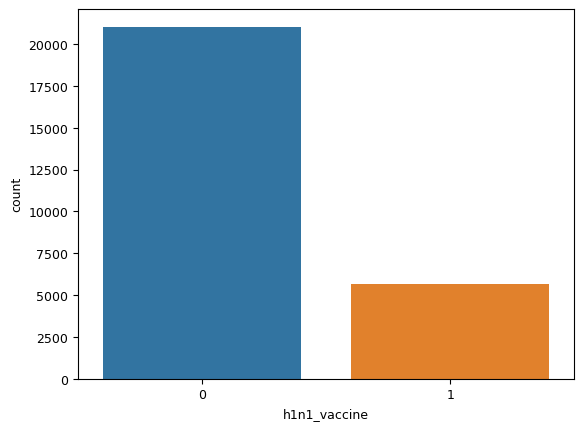

In [ ]:
sns.countplot(x = df.h1n1_vaccine, data=df)
#0 means not vaccinated and 1 means vaccinated

In [ ]:
objects = ['h1n1_worry','h1n1_awareness','is_h1n1_vacc_effective', 'is_h1n1_risky','sick_from_h1n1_vacc',
           'is_seas_vacc_effective','is_seas_risky','sick_from_seas_vacc','age_bracket', 'qualification','income_level']


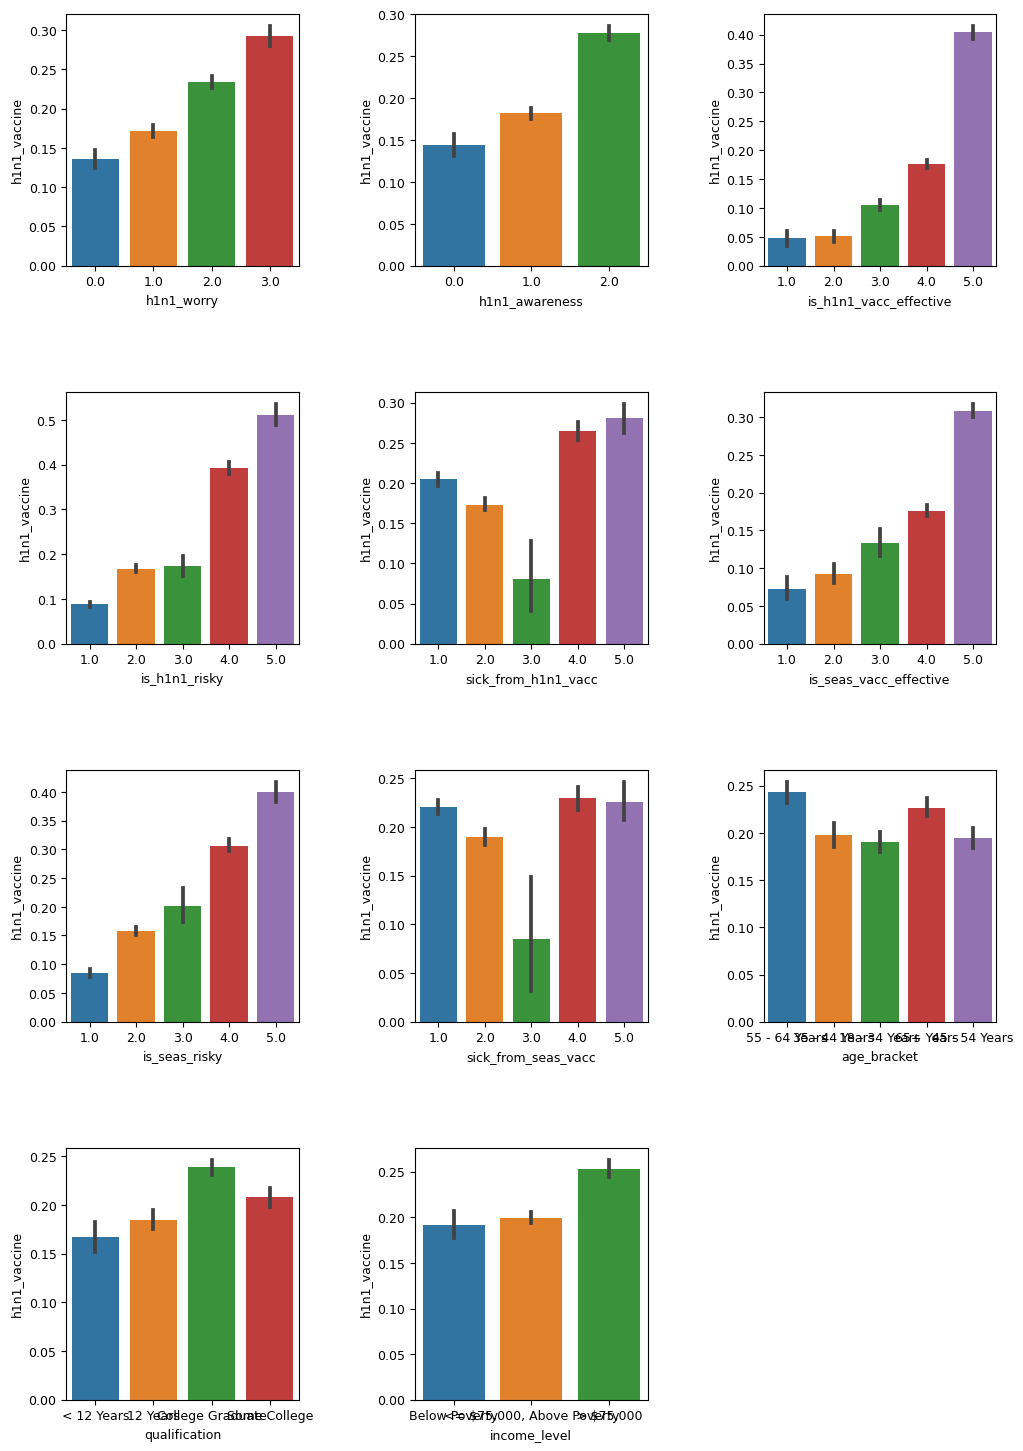

In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl

def plot_all(df, features, num_rows, num_cols, size=(12,18)):
    mpl.rc('font', size=9)
    plt.figure(figsize = size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        sns.barplot(x=feature, y=df['h1n1_vaccine'], data = df, ax= ax)

plot_all(df, objects, 4, 3)

In [ ]:
#I have copied the above code from kaggle to plot all graphs at once


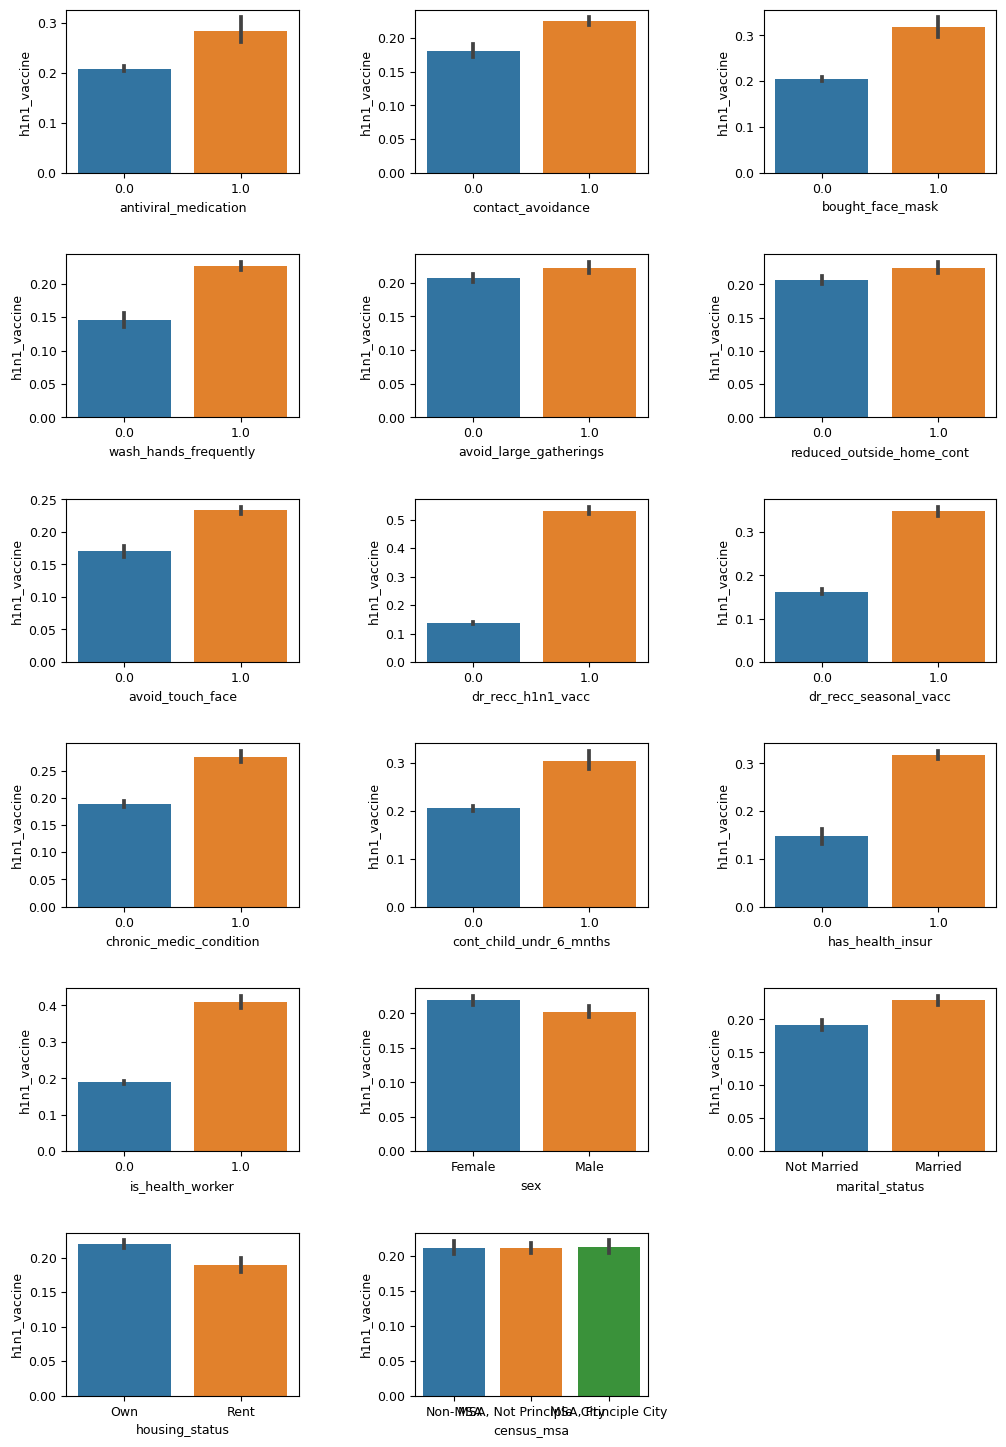

In [ ]:
binary = ['antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont',
          'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths','has_health_insur',
          'is_health_worker', 'sex', 'marital_status','housing_status', 'census_msa']
plot_all(df, binary, 6, 3)

In [ ]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

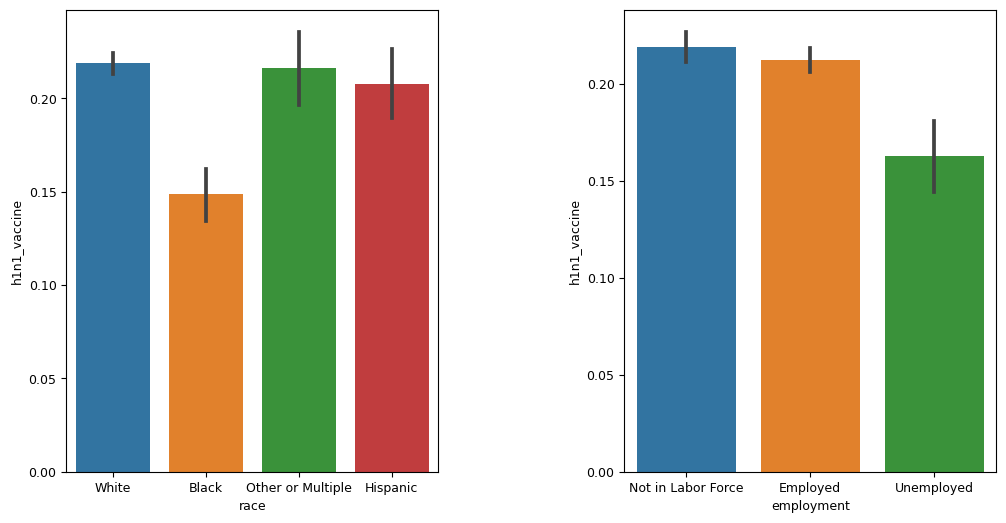

In [ ]:
categorical = ['race', 'employment']
nums = ['no_of_adults', 'no_of_children']

def plot_all1(df, features, num_rows, num_cols, size=(12,6)):
    mpl.rc('font', size=9)
    plt.figure(figsize = size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        sns.barplot(x=feature, y=df['h1n1_vaccine'], data = df, ax= ax)

plot_all1(df, categorical, 1, 2)

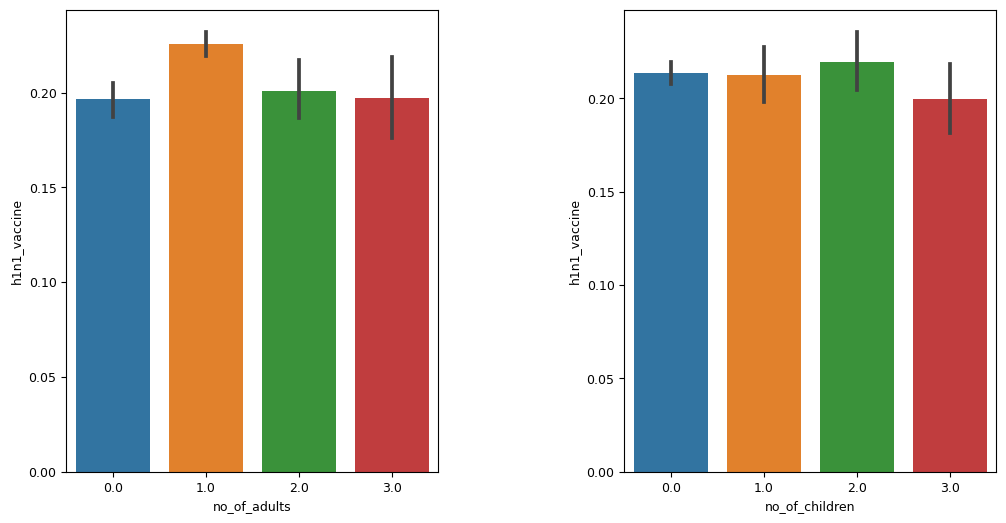

In [ ]:
plot_all1(df, nums, 1, 2)

In [ ]:
#Removing unwanted variables after DataVisualization

unwanted = ['sick_from_h1n1_vacc', 'sick_from_seas_vacc', 'is_seas_vacc_effective', 'housing_status', 'sex', 'census_msa']

df2 = df.drop(unwanted, axis=1)
df2.shape


(26707, 27)

In [ ]:
df2.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
is_seas_risky                float64
age_bracket                   object
qualification                 object
race                          object
income_level                  object
marital_status                object
employment                    object
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
d

In [ ]:
df.shape

(26707, 33)

In [ ]:
#As there is relation between categorical data and target value, we cant remove those columns, so we encode them to unique integer values
#We can encode them using sklearn

data_ordinal = df.loc[:,objects].copy()
data_binary = df.loc[:,binary].copy()
data_categorical = df.loc[:,categorical].copy()
data_numerical = df.loc[:,nums].copy()
data_sorted = pd.concat([data_ordinal, data_binary, data_categorical, data_numerical], axis=1)

data_sorted.shape

(26707, 32)

In [ ]:
data = data_sorted.drop(unwanted, axis = 1)
data.shape

(26707, 26)

In [ ]:
data.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
is_seas_risky                float64
age_bracket                   object
qualification                 object
income_level                  object
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
has_health_insur             float64
is_health_worker             float64
marital_status                object
race                          object
employment                    object
no_of_adults                 float64
no_of_children               float64
dtype: object

In [ ]:
data['married_col'] = data["marital_status"].replace(to_replace = ["Not Married", "Married"], value=[0, 1])

In [ ]:
data.drop(['marital_status'], axis=1,inplace=True)
data.head()

,h1n1_worry,h1n1_awareness,is_h1n1_vacc_effective,is_h1n1_risky,is_seas_risky,age_bracket,qualification,income_level,antiviral_medication,contact_avoidance,...,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,has_health_insur,is_health_worker,race,employment,no_of_adults,no_of_children,married_col
0,1.0,0.0,3.0,1.0,1.0,55 - 64 Years,< 12 Years,Below Poverty,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,White,Not in Labor Force,0.0,0.0,0
1,3.0,2.0,5.0,4.0,2.0,35 - 44 Years,12 Years,Below Poverty,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,White,Employed,0.0,0.0,0
2,1.0,1.0,3.0,1.0,1.0,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",0.0,1.0,...,NaN,1.0,0.0,NaN,0.0,White,Employed,2.0,0.0,0
3,1.0,1.0,3.0,3.0,4.0,65+ Years,12 Years,Below Poverty,0.0,1.0,...,1.0,1.0,0.0,NaN,0.0,White,Not in Labor Force,0.0,0.0,0
4,2.0,1.0,3.0,3.0,1.0,45 - 54 Years,Some College,"<= $75,000, Above Poverty",0.0,1.0,...,0.0,0.0,0.0,NaN,0.0,White,Employed,1.0,0.0,1


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_list = data.columns[0:8].tolist()
ordianl_encoder = OrdinalEncoder()

ordinal_data_encoded = ordianl_encoder.fit_transform(data[ordinal_list])
ordinal_data_encoded

array([[1., 0., 2., ..., 3., 1., 2.],
       [3., 2., 4., ..., 1., 0., 2.],
       [1., 1., 2., ..., 0., 2., 0.],
       ...,
       [2., 2., 3., ..., 3., 3., 0.],
       [1., 1., 2., ..., 0., 3., 0.],
       [0., 0., 4., ..., 4., 3., 0.]])

In [ ]:
ordinal_data_encoded.shape

(26707, 8)

In [ ]:
import scipy.sparse as sparse
ordinal_data_encoded = ordinal_data_encoded.T
arr = sparse.coo_matrix(ordinal_data_encoded)
data1 = data.copy(deep=True)
data1['age_col'] = arr.toarray().tolist()[5]
data1.head()

,h1n1_worry,h1n1_awareness,is_h1n1_vacc_effective,is_h1n1_risky,is_seas_risky,age_bracket,qualification,income_level,antiviral_medication,contact_avoidance,...,chronic_medic_condition,cont_child_undr_6_mnths,has_health_insur,is_health_worker,race,employment,no_of_adults,no_of_children,married_col,age_col
0,1.0,0.0,3.0,1.0,1.0,55 - 64 Years,< 12 Years,Below Poverty,0.0,0.0,...,0.0,0.0,1.0,0.0,White,Not in Labor Force,0.0,0.0,0,3.0
1,3.0,2.0,5.0,4.0,2.0,35 - 44 Years,12 Years,Below Poverty,0.0,1.0,...,0.0,0.0,1.0,0.0,White,Employed,0.0,0.0,0,1.0
2,1.0,1.0,3.0,1.0,1.0,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",0.0,1.0,...,1.0,0.0,NaN,0.0,White,Employed,2.0,0.0,0,0.0
3,1.0,1.0,3.0,3.0,4.0,65+ Years,12 Years,Below Poverty,0.0,1.0,...,1.0,0.0,NaN,0.0,White,Not in Labor Force,0.0,0.0,0,4.0
4,2.0,1.0,3.0,3.0,1.0,45 - 54 Years,Some College,"<= $75,000, Above Poverty",0.0,1.0,...,0.0,0.0,NaN,0.0,White,Employed,1.0,0.0,1,2.0


In [ ]:
data1.drop(['age_bracket'], axis=1, inplace=True)

In [ ]:
data1['education'] = arr.toarray().tolist()[6]
data1['income'] = arr.toarray().tolist()[7]
data1.drop(['income_level'], axis=1, inplace=True)

In [ ]:
data1.head()

,h1n1_worry,h1n1_awareness,is_h1n1_vacc_effective,is_h1n1_risky,is_seas_risky,qualification,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,...,has_health_insur,is_health_worker,race,employment,no_of_adults,no_of_children,married_col,age_col,education,income
0,1.0,0.0,3.0,1.0,1.0,< 12 Years,0.0,0.0,0.0,0.0,...,1.0,0.0,White,Not in Labor Force,0.0,0.0,0,3.0,1.0,2.0
1,3.0,2.0,5.0,4.0,2.0,12 Years,0.0,1.0,0.0,1.0,...,1.0,0.0,White,Employed,0.0,0.0,0,1.0,0.0,2.0
2,1.0,1.0,3.0,1.0,1.0,College Graduate,0.0,1.0,0.0,0.0,...,NaN,0.0,White,Employed,2.0,0.0,0,0.0,2.0,0.0
3,1.0,1.0,3.0,3.0,4.0,12 Years,0.0,1.0,0.0,1.0,...,NaN,0.0,White,Not in Labor Force,0.0,0.0,0,4.0,0.0,2.0
4,2.0,1.0,3.0,3.0,1.0,Some College,0.0,1.0,0.0,1.0,...,NaN,0.0,White,Employed,1.0,0.0,1,2.0,3.0,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

categoty_list = data.columns[22:25].tolist()
onehot_encoder = OneHotEncoder()

categorical_data_encoded = onehot_encoder.fit_transform(data[categoty_list])
categorical_data_encoded = categorical_data_encoded.T

In [ ]:
arr1 = sparse.coo_matrix(categorical_data_encoded)

data1['race_col'] = arr1.toarray().tolist()[0]
data1.drop(['race'], axis=1, inplace=True)

data1['employment_col'] = arr1.toarray().tolist()[0]
data1.drop(['employment', 'qualification'], axis=1, inplace=True)

data1.head()

,h1n1_worry,h1n1_awareness,is_h1n1_vacc_effective,is_h1n1_risky,is_seas_risky,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,...,has_health_insur,is_health_worker,no_of_adults,no_of_children,married_col,age_col,education,income,race_col,employment_col
0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,3.0,1.0,2.0,0.0,0.0
1,3.0,2.0,5.0,4.0,2.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0,1.0,0.0,2.0,1.0,1.0
2,1.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,0.0,2.0,0.0,0,0.0,2.0,0.0,1.0,1.0
3,1.0,1.0,3.0,3.0,4.0,0.0,1.0,0.0,1.0,1.0,...,NaN,0.0,0.0,0.0,0,4.0,0.0,2.0,0.0,0.0
4,2.0,1.0,3.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,...,NaN,0.0,1.0,0.0,1,2.0,3.0,0.0,1.0,1.0


In [ ]:
data1.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
is_seas_risky                  514
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
has_health_insur             12274
is_health_worker               804
no_of_adults                   249
no_of_children                 249
married_col                      0
age_col                          0
education                        0
income                           0
race_col                         0
employment_col                   0
dtype: int64

In [ ]:
df.shape

(26707, 33)

In [ ]:
data1.shape

(26707, 26)

In [ ]:
data1['h1v1_vacc'] = df['h1n1_vaccine']
data1 = data1.replace(to_replace = np.nan, value=-1)
data1.head()

,h1n1_worry,h1n1_awareness,is_h1n1_vacc_effective,is_h1n1_risky,is_seas_risky,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,...,is_health_worker,no_of_adults,no_of_children,married_col,age_col,education,income,race_col,employment_col,h1v1_vacc
0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,3.0,1.0,2.0,0.0,0.0,0
1,3.0,2.0,5.0,4.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,1.0,0.0,2.0,1.0,1.0,0
2,1.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0,0.0,2.0,0.0,1.0,1.0,0
3,1.0,1.0,3.0,3.0,4.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0,4.0,0.0,2.0,0.0,0.0,0
4,2.0,1.0,3.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1,2.0,3.0,0.0,1.0,1.0,0


In [ ]:
x = data1.drop("h1v1_vacc", axis=1)
y = data1.h1v1_vacc

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3,random_state=1)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8498689629352303

In [ ]:
model.score(x_train, y_train)

0.8461538461538461

In [ ]:
predictions = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8498689629352303

<Axes: >

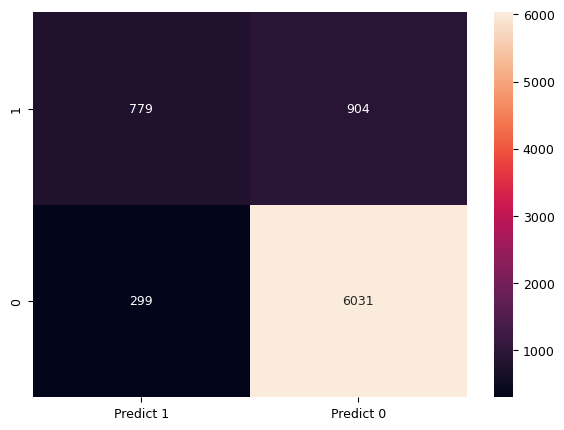

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions, labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in["1", "0"]], columns=[i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7, 5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6330
           1       0.72      0.46      0.56      1683

    accuracy                           0.85      8013
   macro avg       0.80      0.71      0.74      8013
weighted avg       0.84      0.85      0.84      8013



In [138]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=6)
model1.fit(x_train, y_train)
model1.score(x_test, y_test)

0.8496193685261451

In [139]:
model1.score(x_train, y_train)

0.8507542527014015

In [150]:
from sklearn.ensemble import BaggingClassifier
model2 = BaggingClassifier(n_estimators=100, base_estimator=model1)
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.8521153126169974

In [151]:
model2.score(x_train, y_train)

0.8552476730501766

In [152]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier()
model3.fit(x_train, y_train)
model3.score(x_test, y_test)

0.8488705852988893

In [153]:
model3.score(x_train, y_train)

0.8493634321172568

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier()
model4.fit(x_train, y_train)
model4.score(x_test, y_test)

0.8538624734805941

In [156]:
model4.score(x_train, y_train)

0.8564780143361507

In [157]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
model5.fit(x_train, y_train)
model5.score(x_test, y_test)

0.8491201797079745

In [158]:
model5.score(x_train, y_train)

0.9993045897079277

In [159]:
from sklearn.svm import SVC
model6 = SVC(kernel = 'rbf')
model6.fit(x_train, y_train)
model6.score(x_test, y_test)

0.8526145014351678

In [160]:
model6.score(x_train, y_train)

0.8520915801861559

In [165]:
print("GradientBoostingClassifier is the best model with Score = " + str(model4.score(x_test, y_test)))

GradientBoostingClassifier is the best model with Score = 0.8538624734805941


In [166]:
print("Accuracy Score = " + str(accuracy_score(y_test, predictions)))

Accuracy Score = 0.8498689629352303
